In [1]:
subreddits = ['news', 'politics', 'worldnews', 'Liberal', 'progressive', 'democrats', 'Conservative', 'The_Donald', 'Republican']
news_subreddits = ['news', 'politics', 'worldnews']
left_subreddits = ['Liberal', 'progressive', 'democrats']
right_subreddits = ['Republican'] #'Conservative', 'The_Donald', 

In [2]:
import os
os.chdir('../../..')

In [3]:
import convokit
from convokit import Corpus, FightingWords

In [4]:
root_dir = "/Users/calebchiam/Documents/datasets/"

In [5]:
subreddit_corpora = dict()
for subreddit in left_subreddits + right_subreddits:
    subreddit_corpora[subreddit] = Corpus(filename=root_dir + subreddit + "-filtered-labelled-small")

In [6]:
for subreddit, corpus in subreddit_corpora.items():
    print(subreddit)
    corpus.print_summary_stats()
    print()

Liberal
Number of Users: 1259
Number of Utterances: 4610
Number of Conversations: 382

progressive
Number of Users: 1225
Number of Utterances: 4134
Number of Conversations: 562

democrats
Number of Users: 1702
Number of Utterances: 5538
Number of Conversations: 677

Republican
Number of Users: 916
Number of Utterances: 3043
Number of Conversations: 397



In [7]:
political_corpus = None

for subreddit, corpus in subreddit_corpora.items():
    if political_corpus is None:
        political_corpus = corpus
    else:
        political_corpus = political_corpus.merge(corpus)

In [8]:
political_corpus.print_summary_stats()

Number of Users: 4695
Number of Utterances: 17325
Number of Conversations: 2018


In [9]:
FW = FightingWords(l1_selector=lambda utt: utt.meta['subreddit'] == 'democrats', 
                  l2_selector=lambda utt: utt.meta['subreddit'] == 'Republican', ngram=(1,2))

In [10]:
%matplotlib qt
FW.summarize(political_corpus)

l1_func returned 5538 valid utterances. l2_func returned 3043 valid utterances.
Vocab size is 5881
Comparing language...
ngram zscores computed.


,z-score
ngram,
republicans,-11.252099
vote,-10.949509
perspective,-10.672477
unless,-9.448575
ask,-9.426887
purpose,-9.375715
with their,-9.252141
respect,-9.158247
views,-9.120552


In [11]:
FW.annot_method

'top_k'

In [12]:
FW.top_k

10

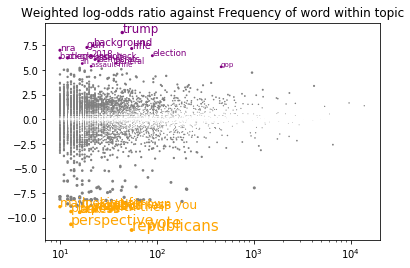

In [21]:
%matplotlib inline
FW.plot_fighting_words(max_label_size=15)

In [14]:
FW.top_k = 15

In [15]:
FW.get_zscore('reform')

3.580565575095159

In [16]:
FW.get_zscore('control')

-0.21827793776864793

In [17]:
FW.get_zscore('liberals')

-2.569353917409525

In [18]:
FW.get_zscore('idiots')

2.0967165337497686

In [19]:
FW.get_zscore('trump')

8.817372394662254

In [20]:
FW.get_zscore('cuck')